# Fraud Detection Using Machine Learning


# **The libraries used are Pandas , Numpy , Sklearn, Matplotlib,Seaborn.**





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
%matplotlib inline 


*Reading the csv file

In [3]:
df=pd.read_csv("Fraud.csv")

*Data Cleaning : Checking For missing and null values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628359 entries, 0 to 3628358
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 304.5+ MB


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [6]:
df.isnull().sum()

step              0
type              1
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

*Dropping NULL values

In [7]:
df=df.dropna(axis=0)

In [8]:
df['isFraud'].value_counts()

0.0    3625255
1.0       3103
Name: isFraud, dtype: int64

 Correlation between the given  Features

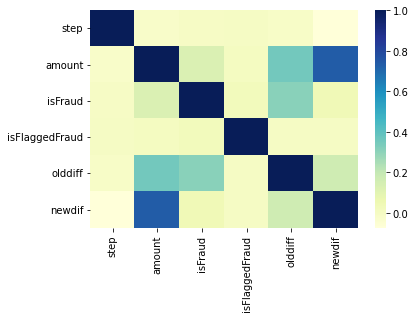

In [55]:
dataplot=sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

# The values that I decided to discard were nameOrig,nameDest since these names are not necessary for calculating Fraud Values , also the no of features i reduced by calculating the difference between the intial and final transaction values of the client and the recepient by taking absolute difference 

In [11]:
df['olddiff']=abs(df['oldbalanceOrg']-df['newbalanceOrig'])
df['newdif']=abs(df['oldbalanceDest']-df['newbalanceDest'])


In [12]:
df.drop(['oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest',], axis='columns',inplace=True)



# Changed the categorical values of type feature into dummy features using One Hot Encoding 

In [13]:
new_df=pd.get_dummies(df, columns=["type"])
new_df

,step,amount,isFraud,isFlaggedFraud,olddiff,newdif,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,0.0,0.0,9839.64,0.00,0,0,0,1,0
1,1,1864.28,0.0,0.0,1864.28,0.00,0,0,0,1,0
2,1,181.00,1.0,0.0,181.00,0.00,0,0,0,0,1
3,1,181.00,1.0,0.0,181.00,21182.00,0,1,0,0,0
4,1,11668.14,0.0,0.0,11668.14,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3628353,274,187794.47,0.0,0.0,187794.47,187794.47,1,0,0,0,0
3628354,274,208643.93,0.0,0.0,208643.93,208643.93,1,0,0,0,0
3628355,274,399491.85,0.0,0.0,399491.85,399491.85,1,0,0,0,0
3628356,274,27033.49,0.0,0.0,27033.50,27033.50,1,0,0,0,0


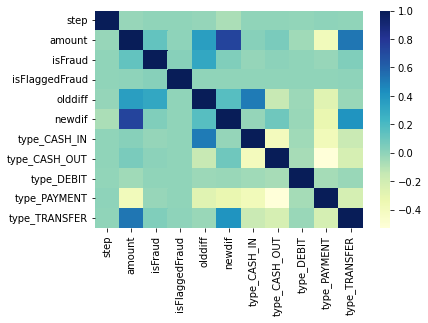

<Figure size 1440x792 with 0 Axes>

In [15]:

dataplot=sns.heatmap(new_df.corr(),cmap="YlGnBu")
plt.figure(figsize=(20, 11))
plt.show()
     

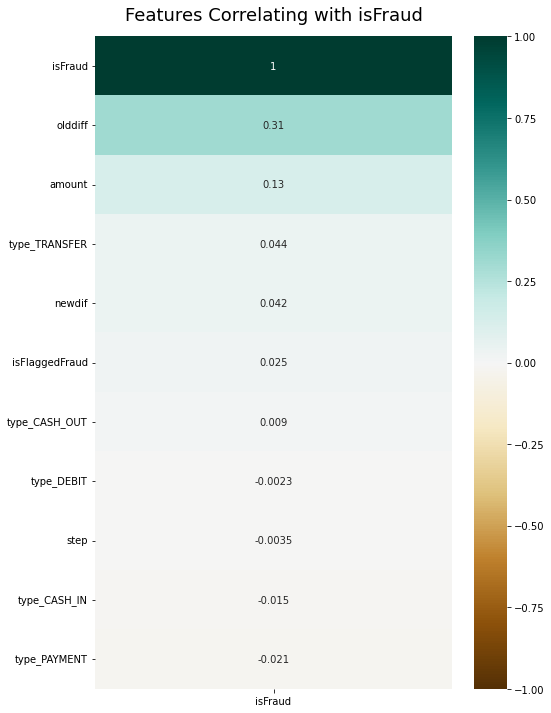

In [16]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(new_df.corr()[['isFraud']].sort_values(by='isFraud', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with isFraud', fontdict={'fontsize':18}, pad=16);

In [17]:
corr_matrix = new_df.corr()
corr_matrix['isFraud'].sort_values(ascending=False)

isFraud           1.000000
olddiff           0.310107
amount            0.129512
type_TRANSFER     0.044019
newdif            0.042155
isFlaggedFraud    0.025377
type_CASH_OUT     0.009045
type_DEBIT       -0.002308
step             -0.003452
type_CASH_IN     -0.015487
type_PAYMENT     -0.020866
Name: isFraud, dtype: float64

*Splitting the dataset into traing and test 

In [18]:
train_set, test_set  = train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 2902686
Rows in test set: 725672



# After I Splitted the dataset into train and test I tried model fitting using Logistic regression to check my accuracy but the model was overfitted ,Since the dataset is highly imbalanced I  performed  under sampling to balance the dataset.

In [19]:
new_df['isFraud'].value_counts()

0.0    3625255
1.0       3103
Name: isFraud, dtype: int64

0 --> Normal Transaction

1 --> fraudulent transaction

In [21]:
legit = new_df[new_df['isFraud'] == 0]
fraud = new_df[new_df['isFraud']== 1]

In [22]:
print(legit.shape)
print(fraud.shape)

(3625255, 11)
(3103, 11)


In [24]:
legit.amount.describe()

count    3.625255e+06
mean     1.549443e+05
std      2.588856e+05
min      2.000000e-02
25%      1.237672e+04
50%      7.505335e+04
75%      2.089622e+05
max      4.746337e+07
Name: amount, dtype: float64

In [25]:
fraud.amount.describe()

count    3.103000e+03
mean     1.346089e+06
std      2.190426e+06
min      0.000000e+00
25%      1.148896e+05
50%      4.125113e+05
75%      1.509294e+06
max      1.000000e+07
Name: amount, dtype: float64

In [27]:
new_df.groupby('isFraud').mean()

,step,amount,isFlaggedFraud,olddiff,newdif,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
isFraud,,,,,,,,,,
0.0,145.964147,1.549443e+05,0.000000,5.111385e+04,164144.027169,0.219077,0.354988,0.00619,0.33745,0.082295
1.0,136.024815,1.346089e+06,0.000645,1.340827e+06,684877.657180,0.000000,0.503062,0.00000,0.00000,0.496938


# Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

In [33]:
legit_sample = legit.sample(n=3103)

*Concatinating two data Frames

In [34]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [35]:
new_dataset.head()

,step,amount,isFraud,isFlaggedFraud,olddiff,newdif,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2534911,205,55792.73,0.0,0.0,55792.73,0.00,0,0,0,1,0
3070267,235,11199.41,0.0,0.0,11199.41,0.00,0,0,0,1,0
1559525,154,11550.08,0.0,0.0,11550.08,0.00,0,0,0,1,0
1205606,133,499144.92,0.0,0.0,155443.00,499144.92,0,1,0,0,0
2331605,188,239960.74,0.0,0.0,0.00,239960.74,0,0,0,0,1


In [36]:
new_dataset['isFraud'].value_counts()

1.0    3103
0.0    3103
Name: isFraud, dtype: int64

In [38]:
new_dataset.groupby('isFraud').mean()

,step,amount,isFlaggedFraud,olddiff,newdif,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
isFraud,,,,,,,,,,
0.0,143.365131,1.514618e+05,0.000000,5.288866e+04,169300.16961,0.219465,0.362875,0.004512,0.334837,0.078311
1.0,136.024815,1.346089e+06,0.000645,1.340827e+06,684877.65718,0.000000,0.503062,0.000000,0.000000,0.496938


In [39]:
X = new_dataset.drop(columns='isFraud', axis=1)
Y = new_dataset['isFraud']

In [40]:
print(X)

         step      amount  ...  type_PAYMENT  type_TRANSFER
2534911   205    55792.73  ...             1              0
3070267   235    11199.41  ...             1              0
1559525   154    11550.08  ...             1              0
1205606   133   499144.92  ...             0              0
2331605   188   239960.74  ...             0              1
...       ...         ...  ...           ...            ...
3626200   274   131594.12  ...             0              0
3626259   274   188441.76  ...             0              1
3626260   274   188441.76  ...             0              0
3627209   274  2274566.61  ...             0              1
3627210   274  2274566.61  ...             0              0

[6206 rows x 10 columns]


In [41]:
print(Y)

2534911    0.0
3070267    0.0
1559525    0.0
1205606    0.0
2331605    0.0
          ... 
3626200    1.0
3626259    1.0
3626260    1.0
3627209    1.0
3627210    1.0
Name: isFraud, Length: 6206, dtype: float64


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(6206, 10) (4964, 10) (1242, 10)


##MODEL SELECTION
  Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
The accuracy came out to be 80% which was improved by using a better model i.e. Decision Tree classifier 


Decision Trees. Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.After applying decision tree the accuracy was improved to 93% and our model performed much better

In [44]:
model = LogisticRegression()

In [45]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [47]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8100322320709106


In [48]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [49]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8043478260869565


## Using Decision Tree Classifier

In [50]:
model2=DecisionTreeClassifier()

In [51]:
# training the Decision Tree Classifier Model with Training Data
model2.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
Y_predict=model2.predict(X_test)
test_data_ACC = accuracy_score(Y_predict, Y_test)
test_data_ACC


0.9371980676328503

# The key factors that can predict fradulent customer are 

*The past order details.

*Their preferred payment methods

*The locations they have used for the transactions.

*Their network (emails, phone numbers, and payment details entered with the online account).

*The amount of money they have used in transactions

*The amount of money Transferred to recepient.

# Possible prevention that should be adopted to avoid fraudulent transactions are 

*Maintain awareness of the latest fraud trends.

*Partner with a verified payment processor.

*Encrypt transactions and emails containing confidential information.

*Ensure that tokens and login credentials are regularly changed.

*Use AI and ML based models to for security purposes

# How to Ensure Preventions are implemented


*All the models and technologies that have been used to develop fraud prevention schemes must be stay updated with the varies in data and theft in transaction schemes it is important to keep in par with updations requiewd



*Ensuring Awareness

Awareness affects all employees. Everyone within the organization should be aware of the fraud risk policy including types of fraud and the consequences associated with them. 

Internal control programs should be monitored and revised on a consistent basis to ensure they are effective and current with technological and other advances. If you do not have an internal control process or fraud prevention program in place, then you should hire a professional with experience in this area. An expert will analyze the company’s policies and procedures, recommend appropriate programs and assist with implementation.

*Hire Trustworthy Experts

When hiring accountants, fraud examiners, and other expert professionals who will have access to sensitive company information such as bank account numbers, it is critical to ensure these firms or individuals have reputations built on quality service and trustworthiness. 

*Live Work Culture

A positive work environment can prevent employee fraud and theft. There should be a clear organizational structure, written policies and procedures and fair employment practices. 

